# U.S. Medical Insurance Costs

This projects seeks to analyse data about the cost of medical insurance for individuals living in the US. By visualising data, we will find out how age combined with secondary factors increases or decreases insurance costs.

The dataset was taken from Codecademy and is part of the Data Scientist: Natural Language Processing course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
import numpy as np

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here we can see the insurance.csv dataset consists of 7 columns describing the characteristics on inidivduals, and is indexed numerically. Looking at the whole file, we can also see that there is no missing data in any of the fields. For this reason, all we need to do to clean the data is to make sure the data types of each column are correct.

In [2]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

These datatypes are all acceptable. However, it may be helpful to change smokers to a boolean, where `True` represents smokers and `False` represents non-smokers. We will also change sex to be a boolean where `True` represents male and `False` represents female. We could also change region to be a string. However, since we will not need to do any string manipulation in this project, we will leave this variable as an object.

In [3]:
# change smoker to boolean
df.loc[df["smoker"] == "yes", "smoker"] = True
df.loc[df["smoker"] == "no", "smoker"] = False

df["smoker"] = df["smoker"].astype("boolean")

# change sex to boolean
df.loc[df["sex"] == "male", "sex"] = True
df.loc[df["sex"] == "female", "sex"] = False

df["sex"] = df["sex"].astype("boolean")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
1,18,True,33.770,1,False,southeast,1725.55230
2,28,True,33.000,3,False,southeast,4449.46200
3,33,True,22.705,0,False,northwest,21984.47061
4,32,True,28.880,0,False,northwest,3866.85520


We can see that the smoker column has sucessfully been converted into booleans.

## Analysis
### How does age affect cost?

Now we will analyse how age affects insurance cost. To do this, let's first extract the age and charges columns and calculate summary statistics about them. After this we can create a scatter plot and a line-of-best-fit using linear regression to find their relationship.

In [5]:
df[["age", "charges"]].describe()

,age,charges
count,1338.000000,1338.000000
mean,39.207025,13270.422265
std,14.049960,12110.011237
min,18.000000,1121.873900
25%,27.000000,4740.287150
50%,39.000000,9382.033000
75%,51.000000,16639.912515
max,64.000000,63770.428010


The mean cost of insurance is \\$13,270.42, while the minimum is \\$1121.87 and the maximum is \\$63,770.42. The standard deviation is \\$12,110.01. This is quite a large value, meaning the range of possible costs is quite spread across the population.

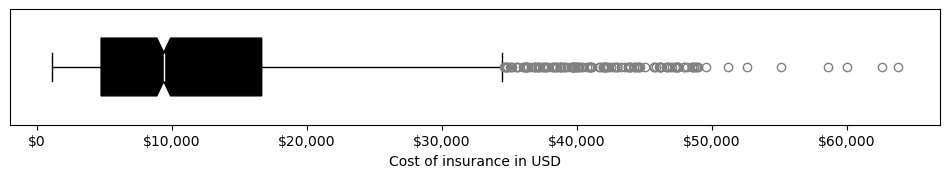

In [6]:
# Set up plot
fig, ax = plt.subplots(figsize=(12, 1.5))

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

# plot boxplot of insurance costs
box1 = ax.boxplot(df["charges"], labels=["charges"], vert=False, notch=True, patch_artist=True, widths=0.5)
plt.xlabel("Cost of insurance in USD")
plt.yticks([])

# add dollar sign to the x-axis
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# change the colour
plt.setp(box1["boxes"], facecolor="black")
plt.setp(box1["medians"], color="white")
plt.setp(box1["fliers"], markeredgecolor="grey")

plt.show()

From the insurance cost boxplot, we can see that there are also a large number of outliers whose insurance costs are extremely high. These people may be interesting to investigate individually to see why exactly their insurance costs are so abnormally high.

The summary statistics also say that across the 1338 individuals recorded in the dataset, the youngest is 18 years old and the oldest is 64. The average age is 39 years old.

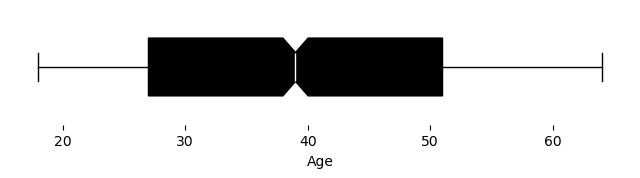

In [7]:
# plot ages boxplot

fig, ax = plt.subplots(figsize=(8, 1.5))

box2 = ax.boxplot(df["age"], labels=["age"], vert=False, notch=True, patch_artist=True, widths=0.5)
plt.xlabel("Age")
plt.yticks([])

plt.setp(box2["boxes"], facecolor="black")
plt.setp(box2["medians"], color="white")
plt.setp(box2["fliers"], color="grey")

plt.show()

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!now find regression line, explain what it is

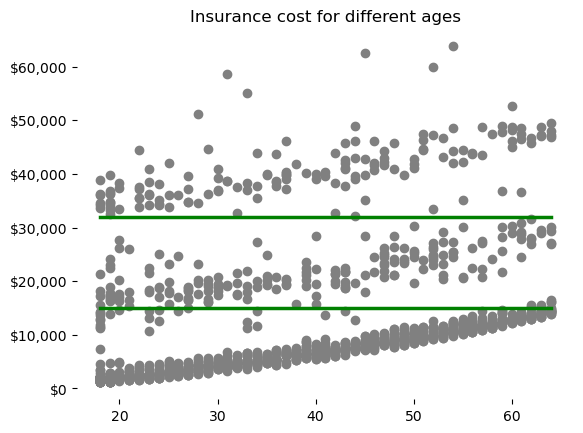

In [8]:
# plot age and insurance cost data
x = df["age"]
y = df["charges"]

fig, ax = plt.subplots()
ax.scatter(x, y, color="grey")

# find regression line y = mx + c
m, c = np.polyfit(x, y, deg=1)
xseq = np.linspace(18, 64, num=500)
#ax.plot(xseq, m*xseq + c, color="red", lw=2.5)

# disect the plot
ax.plot(xseq, [15000 for i in xseq], color="green", lw=2.5)
ax.plot(xseq, [32000 for i in xseq], color="green", lw=2.5)

# add dollar sign to y-axis
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.title("Insurance cost for different ages")
plt.show()

Here we can see there are three distinct groups an individual could be in when regarding their age and insurance costs. One group ranges from near nothing for younger people to about \\$17,00 for the oldest. The second group ranges from around \\$11,000 for the youngest to around \\$32,000 for the oldest. The final group ranges from about \\$32,000 for the youngest to around \\$50,000 for the oldest. (The three groups have been rougly separated by the green lines at \\$14,000 and at \\$32,000). There are almost certainly additional underlying factors which can make an individual more at risk. These factors would cause the three distinct groupings. For this reason it does not make sense to plot one single regression line.

Let's investigate each group individually to see what members have in common, starting with the lowest insurance costs.

In [9]:
group1 = df[df["charges"] < 15000]
group2 = df[(df["charges"] >= 15000) & (df["charges"] < 32000)]
group3 = df[df["charges"] >= 32000]

group1.head(10)

,age,sex,bmi,children,smoker,region,charges
1,18,True,33.77,1,False,southeast,1725.5523
2,28,True,33.00,3,False,southeast,4449.4620
4,32,True,28.88,0,False,northwest,3866.8552
5,31,False,25.74,0,False,southeast,3756.6216
6,46,False,33.44,1,False,southeast,8240.5896
7,37,False,27.74,3,False,northwest,7281.5056
8,37,True,29.83,2,False,northeast,6406.4107
10,25,True,26.22,0,False,northeast,2721.3208
12,23,True,34.40,0,False,southwest,1826.8430
13,56,False,39.82,0,False,southeast,11090.7178


In [10]:
group2.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,False,27.900,0,True,southwest,16884.92400
3,33,True,22.705,0,False,northwest,21984.47061
9,60,False,25.840,0,False,northwest,28923.13692
11,62,False,26.290,0,True,southeast,27808.72510
36,62,False,32.965,3,False,northwest,15612.19335
45,55,True,37.300,0,False,southwest,20630.28351
52,48,True,28.000,1,True,southwest,23568.27200
58,53,False,22.880,1,True,southeast,23244.79020
62,64,True,24.700,1,False,northwest,30166.61817
69,28,True,23.980,3,True,southeast,17663.14420


In [11]:
group3.head(10)

,age,sex,bmi,children,smoker,region,charges
14,27,True,42.13,0,True,southeast,39611.75770
19,30,True,35.30,0,True,southwest,36837.46700
23,34,False,31.92,1,True,northeast,37701.87680
29,31,True,36.30,2,True,southwest,38711.00000
30,22,True,35.60,0,True,southwest,35585.57600
34,28,True,36.40,1,True,southwest,51194.55914
38,35,True,36.67,1,True,northeast,39774.27630
39,60,True,39.90,0,True,southwest,48173.36100
49,36,True,35.20,1,True,southeast,38709.17600
53,36,True,34.43,0,True,southeast,37742.57570


We can quite clearly see that group 1, the group with the lowest insurance costs, are non-smokers and that group 3, the group with the highest insurance costs, are smokers. But what about group 2?

Let's plot the graph again, marking secondary characteristics, such as whether an individual smokes, is male or female, and their bmi in different colours.

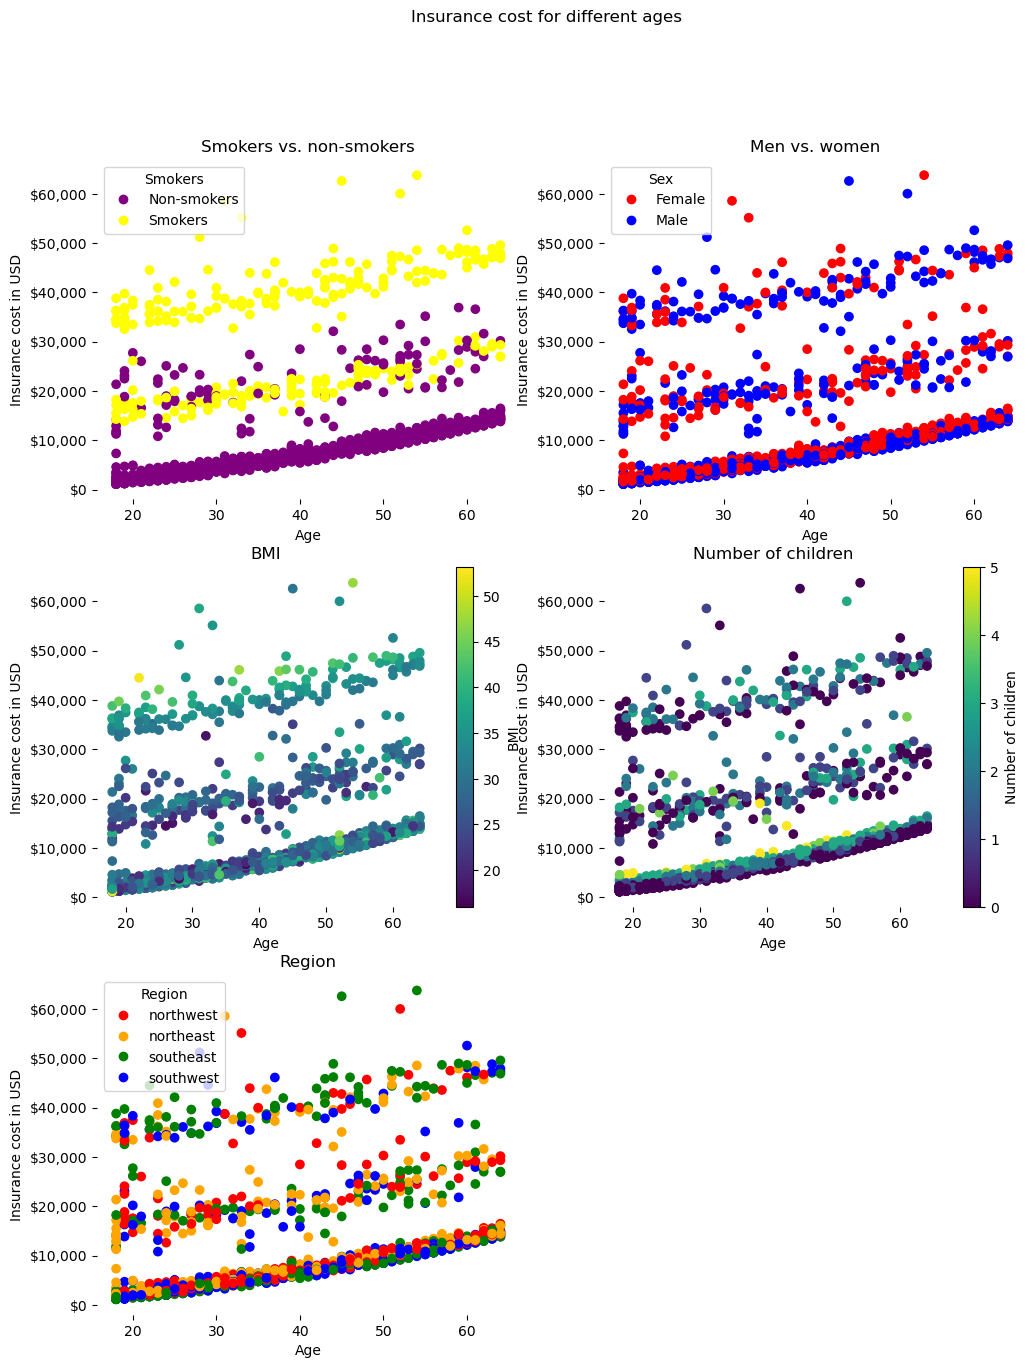

In [12]:
# plot age and insurance cost data
x = df["age"]
y = df["charges"]

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# plot smokers vs non-smokers
smokerColours = {True:"yellow", False:"purple"}
axs[0,0].scatter(x, y, c=df["smoker"].map(smokerColours))
axs[0,0].set_title("Smokers vs. non-smokers")
smokerLabels = [
    Line2D([0], [0], marker='o', linestyle='', color='purple', label='Non-smokers'),
    Line2D([0], [0], marker='o', linestyle='', color='yellow', label='Smokers')
]
axs[0,0].legend(handles=smokerLabels, title="Smokers")

# plot men vs. women
sexColours = {False: "red", True: "blue"}
axs[0,1].scatter(x, y, c=df["sex"].map(sexColours))
axs[0,1].set_title("Men vs. women")
sexLabels = [
    Line2D([0], [0], marker='o', linestyle='', color='red', label='Female'),
    Line2D([0], [0], marker='o', linestyle='', color='blue', label='Male')
]
axs[0,1].legend(handles=sexLabels, title="Sex")

# plot BMI
bmiPlot = axs[1,0].scatter(x, y, c=df["bmi"])
axs[1,0].set_title("BMI")
fig.colorbar(bmiPlot, ax=axs[1,0], label="BMI")

# plot number of children
childrenPlot = axs[1,1].scatter(x, y, c=df["children"])
axs[1,1].set_title("Number of children")
fig.colorbar(childrenPlot, ax=axs[1,1], label="Number of children")

# plot region
regionColours={'northwest':'red', 'northeast':'orange', 'southeast':'green', 'southwest':'blue'}
axs[2,0].scatter(x, y, c=df['region'].map(regionColours))
axs[2,0].set_title("Region")
regionLabels = [
    Line2D([0], [0], marker='o', linestyle='', label=region, color=color)
    for region, color in regionColours.items()
]
axs[2,0].legend(handles=regionLabels, title="Region")

axs[2,1].set_visible(False)


# add dollar sign to y-axes
for ax in axs.flat:
    ax.set(xlabel='Age', ylabel='Insurance cost in USD')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

fig.suptitle("Insurance cost for different ages")
plt.show()

It's still not too clear which features define group 2. There is a mix of smokers and non-smokers in group 2, as well as a mix of men and women and of region. We can also see that having a lower BMI or fewer children both tend to reduce insurance costs, but neither of these are decicive factor in determining which grouping an individual will be in.

Let's investigate the smokers and non-smokers separately to see if 

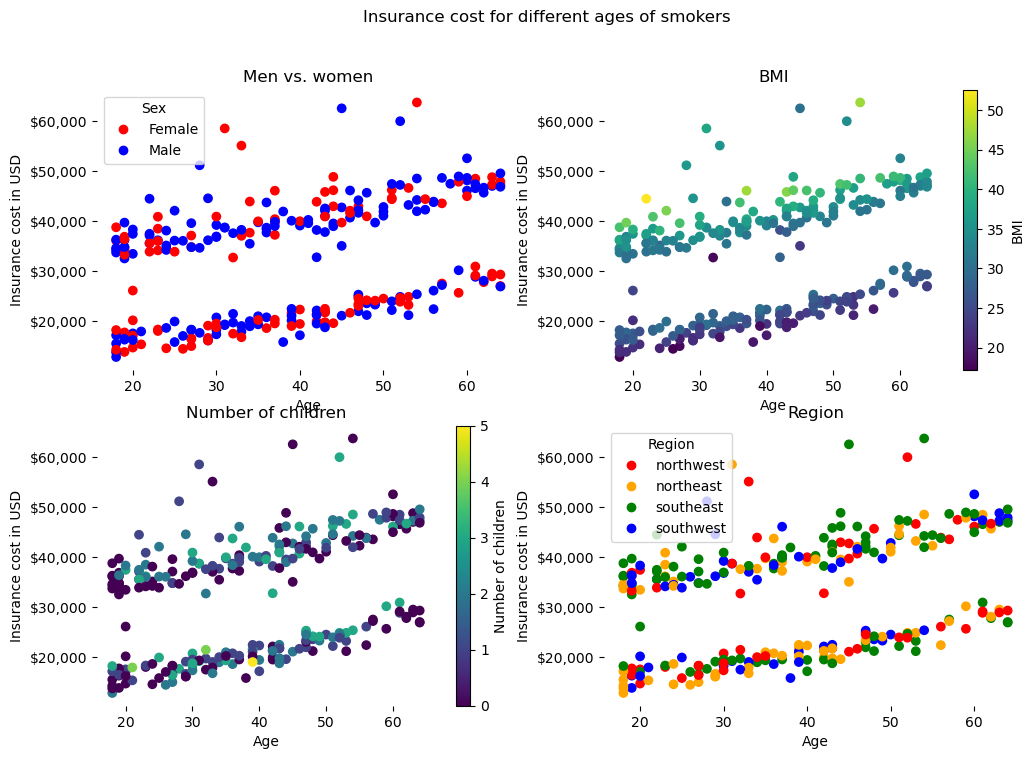

In [13]:
smokersOnly = df[df["smoker"] == True]

x = smokersOnly["age"]
y = smokersOnly["charges"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].scatter(x, y, c=smokersOnly["sex"].map(sexColours))
axs[0,0].set_title("Men vs. women")
sexLabels = [
    Line2D([0], [0], marker='o', linestyle='', color='red', label='Female'),
    Line2D([0], [0], marker='o', linestyle='', color='blue', label='Male')
]
axs[0,0].legend(handles=sexLabels, title="Sex")

bmiPlot = axs[0,1].scatter(x, y, c=smokersOnly["bmi"])
axs[0,1].set_title("BMI")
fig.colorbar(bmiPlot, ax=axs[0,1], label="BMI")

childrenPlot = axs[1,0].scatter(x, y, c=smokersOnly["children"])
axs[1,0].set_title("Number of children")
fig.colorbar(childrenPlot, ax=axs[1,0], label="Number of children")

axs[1,1].scatter(x, y, c=smokersOnly['region'].map(regionColours))
axs[1,1].set_title("Region")
regionLabels = [
    Line2D([0], [0], marker='o', linestyle='', label=region, color=color)
    for region, color in regionColours.items()
]
axs[1,1].legend(handles=regionLabels, title="Region")

# add dollar sign to y-axes
for ax in axs.flat:
    ax.set(xlabel='Age', ylabel='Insurance cost in USD')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

fig.suptitle("Insurance cost for different ages of smokers")
plt.show()

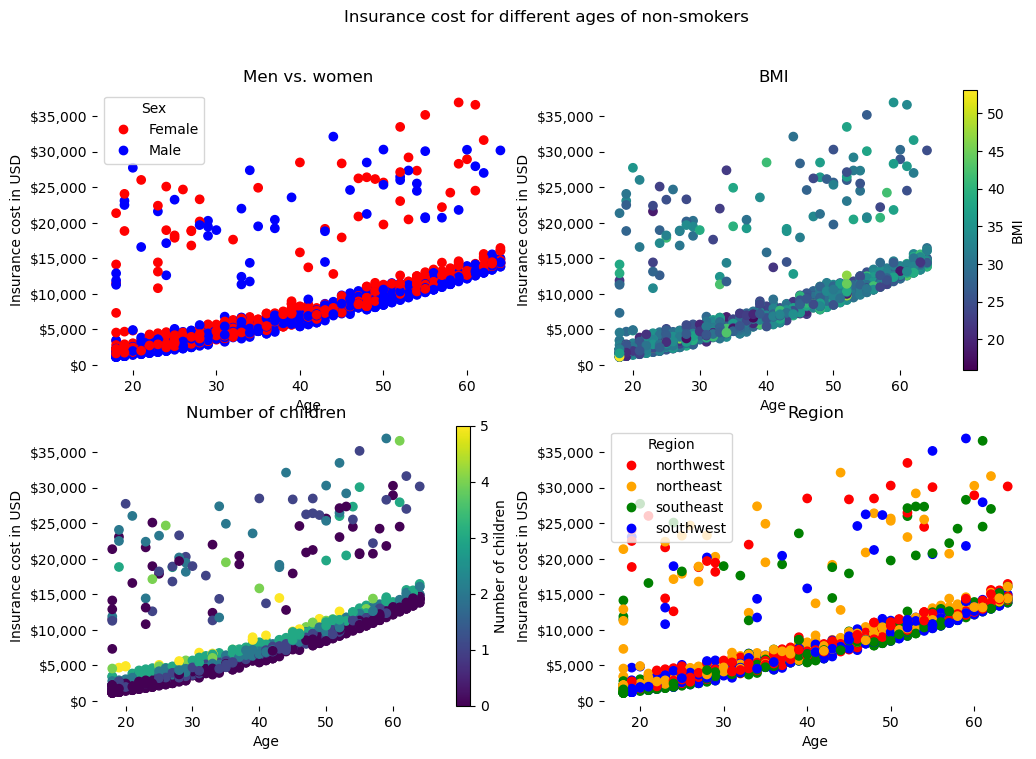

In [14]:
nonSmokersOnly = df[df["smoker"] == False]

x = nonSmokersOnly["age"]
y = nonSmokersOnly["charges"]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0,0].scatter(x, y, c=nonSmokersOnly["sex"].map(sexColours))
axs[0,0].set_title("Men vs. women")
sexLabels = [
    Line2D([0], [0], marker='o', linestyle='', color='red', label='Female'),
    Line2D([0], [0], marker='o', linestyle='', color='blue', label='Male')
]
axs[0,0].legend(handles=sexLabels, title="Sex")

bmiPlot = axs[0,1].scatter(x, y, c=nonSmokersOnly["bmi"])
axs[0,1].set_title("BMI")
fig.colorbar(bmiPlot, ax=axs[0,1], label="BMI")

childrenPlot = axs[1,0].scatter(x, y, c=nonSmokersOnly["children"])
axs[1,0].set_title("Number of children")
fig.colorbar(childrenPlot, ax=axs[1,0], label="Number of children")

axs[1,1].scatter(x, y, c=nonSmokersOnly['region'].map(regionColours))
axs[1,1].set_title("Region")
regionLabels = [
    Line2D([0], [0], marker='o', linestyle='', label=region, color=color)
    for region, color in regionColours.items()
]
axs[1,1].legend(handles=regionLabels, title="Region")

# add dollar sign to y-axes
for ax in axs.flat:
    ax.set(xlabel='Age', ylabel='Insurance cost in USD')
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

fig.suptitle("Insurance cost for different ages of non-smokers")
plt.show()

Still, there seems to be be no clear factor that distinguishes group 1 from group2 or group 2 for group 3: there is a mixture of ages, sexes, BMIs, children and regions in each group. There may be a more complex reason behind these groupings caused by a factor that was not captured during the data collection. It may be appropriate to recollect the data or build a more complex regression model.

For the best results, we could use k-means clustering to determine exactly which points belong in each group before conducting regression analysis.

For now however, we will draw three regression lines for each group, dividing the group arbritarily.

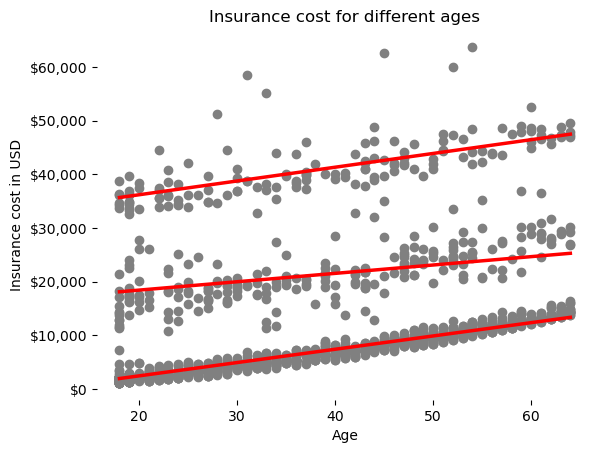

In [15]:
fig, ax = plt.subplots()

# scatter plot and regression line for group 1
x1 = group1["age"]
y1 = group1["charges"]

ax.scatter(x1, y1, color="grey", label="Group 1")
m1, c1 = np.polyfit(x1, y1, deg=1)
xseq = np.linspace(18, 64, num=500)
ax.plot(xseq, m1*xseq + c1, color="red", lw=2.5)

# scatter plot and regression line for group 2
x2 = group2["age"]
y2 = group2["charges"]

ax.scatter(x2, y2, color="grey")
m2, c2 = np.polyfit(x2, y2, deg=1)
ax.plot(xseq, m2*xseq + c2, color="red", lw=2.5)

# scatter plot and regression line for group 3
x3 = group3["age"]
y3 = group3["charges"]

ax.scatter(x3, y3, color="grey")
m3, c3 = np.polyfit(x3, y3, deg=1)
ax.plot(xseq, m3*xseq + c3, color="red", lw=2.5)

# add dollar sign to y-axis
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.xlabel("Age")
plt.ylabel("Insurance cost in USD")
plt.title("Insurance cost for different ages")
plt.show()

# Reference documentation
- https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color
- https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels
- https://stackoverflow.com/questions/8202605/how-to-color-scatter-markers-as-a-function-of-a-third-variable
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html